In [134]:
#importing necessory libraries
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

In [135]:
def loadObject(fname):
    with open(fname, "rb") as obj_file:  # Open in binary mode
        obj = pickle.load(obj_file)
    return obj

def extract_atiras(database):
    db1 = database[database['a'] <= 1.0]    # atiras have a<=1AU and Q<=.983AU
    db2=db1[2*db1['a']-db1['q']<=.983]
    return db2, len(db2)

def extract_atens(database):
    db1 = database[database['a'] <= 1.0]
    db2=db1[2*db1['a']-db1['q']>=.938]
    return db2, len(db2)
 
def get_apollos(database):
    db1 = database[database['a'] >= 1.0]
    db2 = db1[db1['q'] <= 1.017]
    return db2, len(db2)

def normalize_data(dataframe,columns=[],min_maz_norm=True):
    try:
        norm_db=dataframe[columns]
    except:
        print("some error")
        raise KeyError
    # return norm_db
    for i in columns:
        if(min_maz_norm):
            norm_db[i]=(norm_db[i]-min(norm_db[i]))/(max(norm_db[i])-min(norm_db[i]))
        # pending normalization zero mean unit variance
    return norm_db

def split_by_colval(dataset, colname, value):
    dataset_left = dataset[dataset[colname] <= value]
    dataset_right = dataset[dataset[colname] > value]
    return dataset_left, dataset_right

def add_doublemirror_column(dataset, colname, value):
    """ 
    Extends dataset by its mirrors over the 'value' and 
    the half 'value' of the 'colname'.
    """

    left, right = split_by_colval(dataset, colname, value)
    left_mir, right_mir = map(deepcopy, [left, right])
    left_mir[colname] = value - left[colname]
    right_mir[colname] = 3*value - right[colname]
    half_mirror = pd.concat((left_mir, right_mir, dataset))

    dataset_mirror = deepcopy(half_mirror)
    dataset_mirror[colname] = value*2 - dataset_mirror[colname]
    dataset_extended = pd.concat((half_mirror, dataset_mirror))

    return dataset_extended

In [136]:
dirpath = './data/'
real_datasets = ['haz_real', 'nohaz_real']
gen_datasets = ['haz_nonuniform', 'nohaz_nonuniform']
genu_datasets = ['haz_uniform', 'nohaz_uniform']
name_sufixes = ['_domain3.p', '_domain3_rest.p']
dumps_real = [dirpath + ds + ns for ns in name_sufixes for ds in real_datasets]
dumps_gen = [dirpath + ds + ns for ns in name_sufixes for ds in gen_datasets]
dumps_genu = [dirpath + ds + ns for ns in name_sufixes for ds in genu_datasets]

haz_real, nohaz_real, haz_real_rest, nohaz_real_rest = map(loadObject, dumps_real)
haz_gen, nohaz_gen, haz_gen_rest, nohaz_gen_rest = map(loadObject, dumps_gen)
haz_genu, nohaz_genu, haz_genu_rest, nohaz_genu_rest = map(loadObject, dumps_genu)
gen_num = sum(map(len, [haz_gen, nohaz_gen]))
real_num = sum(map(len, [haz_real, nohaz_real]))

print ("Number of virtual asteroids in the domain:", gen_num)
print ("Number of real asteroids in the domain:", real_num)

Number of virtual asteroids in the domain: 125
Number of real asteroids in the domain: 125


In [163]:
haz_gen_atiras, haz_gen_atiras_num = add_doublemirror_column(extract_atiras(haz_gen)[0], 'w', 180.0),extract_atiras(haz_gen)[1]*4
nohaz_gen_atiras, nohaz_gen_atiras_num = add_doublemirror_column(extract_atiras(nohaz_gen)[0], 'w', 180.0),extract_atiras(nohaz_gen)[1]*4
atiras_gen_num = haz_gen_atiras_num + nohaz_gen_atiras_num

haz_real_atiras, haz_real_atiras_num = add_doublemirror_column(extract_atiras(haz_real)[0], 'w', 180.0),extract_atiras(haz_real)[1]*4
nohaz_real_atiras, nohaz_real_atiras_num = add_doublemirror_column(extract_atiras(nohaz_real)[0], 'w', 180.0),extract_atiras(nohaz_real)[1]*4
atiras_real_num = haz_real_atiras_num + nohaz_real_atiras_num

print ("Number of virtual Atiras:", atiras_gen_num)
print ("Number of real Atiras:", atiras_real_num)

Number of virtual Atiras: 8
Number of real Atiras: 8


In [164]:
haz_gen_atens, haz_gen_atens_num = add_doublemirror_column(extract_atens(haz_gen)[0], 'w', 180.0),extract_atens(haz_gen)[1]*4
nohaz_gen_atens, nohaz_gen_atens_num = add_doublemirror_column(extract_atens(nohaz_gen)[0], 'w', 180.0),extract_atens(nohaz_gen)[1]*4
atens_gen_num = haz_gen_atens_num + nohaz_gen_atens_num

haz_real_atens, haz_real_atens_num = add_doublemirror_column(extract_atens(haz_real)[0], 'w', 180.0),extract_atens(haz_real)[1]*4
nohaz_real_atens, nohaz_real_atens_num = add_doublemirror_column(extract_atens(nohaz_real)[0], 'w', 180.0),extract_atens(nohaz_real)[1]*4
atens_real_num = haz_real_atens_num + nohaz_real_atens_num

print ("Number of virtual Atens:", atens_gen_num)
print ("Number of real Atens:", atens_real_num)

Number of virtual Atens: 108
Number of real Atens: 108


In [165]:
#combining atiras and atens
haz_gen_atiras_atens=pd.concat([haz_gen_atiras,haz_gen_atens])
nohaz_gen_atiras_atens=pd.concat([nohaz_gen_atiras,nohaz_gen_atens])
haz_real_atiras_atens=pd.concat([haz_real_atiras,haz_real_atens])
nohaz_real_atiras_atens=pd.concat([nohaz_real_atiras,nohaz_real_atens])

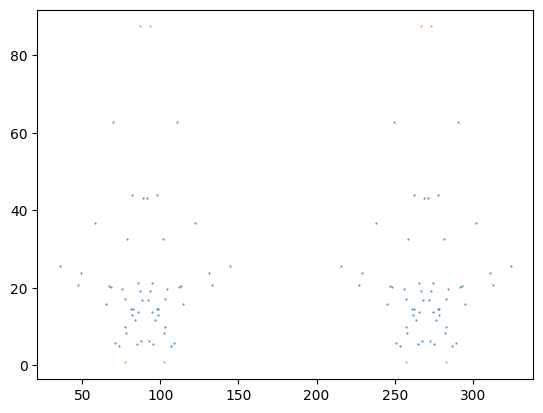

In [166]:
plt.scatter(np.array(nohaz_gen_atiras_atens['w']),np.array(nohaz_gen_atiras_atens['i']),s=.2)
plt.scatter(np.array(haz_gen_atiras_atens['w']),np.array(haz_gen_atiras_atens['i']),s=.2)

In [167]:
norm_haz_gen_atiras_atens=normalize_data(haz_gen_atiras_atens,columns=['w','i'])
norm_nohaz_gen_atiras_atens=normalize_data(nohaz_gen_atiras_atens,columns=['w','i'])
norm_haz_real_atiras_atens=normalize_data(haz_real_atiras_atens,columns=['w','i'])
norm_nohaz_real_atiras_atens=normalize_data(nohaz_real_atiras_atens,columns=['w','i'])

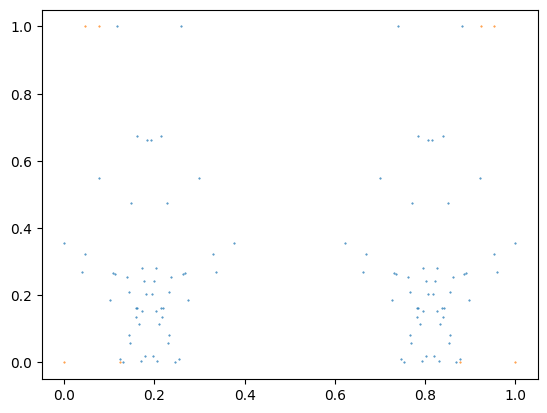

In [168]:
plt.scatter(np.array(norm_nohaz_gen_atiras_atens['w']),np.array(norm_nohaz_gen_atiras_atens['i']),s=.2)
plt.scatter(np.array(norm_haz_gen_atiras_atens['w']),np.array(norm_haz_gen_atiras_atens['i']),s=.2)

In [169]:
from sklearn import neighbors, svm
from sklearn.model_selection import train_test_split
data=pd.concat([norm_haz_gen_atiras_atens,norm_nohaz_gen_atiras_atens])
data_label=[1 for i in range(len(norm_haz_gen_atiras_atens))]
for i in range(len(norm_nohaz_gen_atiras_atens)):
    data_label.append(0)
train_data,test_data,train_label,test_label=train_test_split(data,data_label,test_size=0.3,shuffle=True)
len(train_data)

81

In [170]:
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier(max_depth=5,min_samples_split=2,)   
clf.fit(train_data,train_label)
y_pred=clf.predict(test_data)
from sklearn import metrics   
print() 
  
# using metrics module for accuracy calculation 
print("ACCURACY OF THE RANDOM FOREST MODEL: ", metrics.accuracy_score(test_label, y_pred)) 


ACCURACY OF THE RANDOM FOREST MODEL:  0.9714285714285714


In [145]:
# train_label

In [171]:
from xgboost import XGBClassifier
model_xg=XGBClassifier()
model_xg.fit(train_data,train_label)
y_pred=model_xg.predict(test_data)
print() 
  
# using metrics module for accuracy calculation 
print("ACCURACY OF THE XGBOOST MODEL: ", metrics.accuracy_score(test_label, y_pred))


ACCURACY OF THE XGBOOST MODEL:  0.9714285714285714


In [172]:
model_svm=svm.SVC()
model_svm.fit(train_data,train_label)
y_pred=model_svm.predict(test_data)
print() 
  
# using metrics module for accuracy calculation 
print("ACCURACY OF THE SVM MODEL: ", metrics.accuracy_score(test_label, y_pred))


ACCURACY OF THE SVM MODEL:  0.9714285714285714


APOLLOS

In [148]:
haz_gen_apollo, haz_gen_apollo_num = add_doublemirror_column(get_apollos(haz_gen)[0], 'w', 180.0),get_apollos(haz_gen)[1]*4
nohaz_gen_apollo, nohaz_gen_apollo_num = add_doublemirror_column(get_apollos(nohaz_gen)[0], 'w', 180.0),get_apollos(nohaz_gen)[1]*4
apollo_gen_num = haz_gen_apollo_num + nohaz_gen_apollo_num

haz_genu_apollo, haz_genu_apollo_num = add_doublemirror_column(get_apollos(haz_genu)[0], 'w', 180.0),get_apollos(haz_genu)[1]*4
nohaz_genu_apollo, nohaz_genu_apollo_num = add_doublemirror_column(get_apollos(nohaz_genu)[0], 'w', 180.0),get_apollos(nohaz_genu)[1]*4
apollo_genu_num = haz_genu_apollo_num + nohaz_genu_apollo_num

haz_real_apollo, haz_real_apollo_num = add_doublemirror_column(get_apollos(haz_real)[0], 'w', 180.0),get_apollos(haz_real)[1]*4
nohaz_real_apollo, nohaz_real_apollo_num = add_doublemirror_column(get_apollos(nohaz_real)[0], 'w', 180.0),get_apollos(nohaz_real)[1]*4
apollo_real_num = haz_real_apollo_num + nohaz_real_apollo_num


In [149]:
print ("Number of virtual PHAs in the group:", haz_gen_apollo_num)
print ("Number of virtual NHAs in the group:", nohaz_gen_apollo_num)
print ("Number of virtual Apollo:", apollo_gen_num)
print ("Apollo group weight:", float(apollo_gen_num)/gen_num)

Number of virtual PHAs in the group: 180
Number of virtual NHAs in the group: 204
Number of virtual Apollo: 384
Apollo group weight: 3.072


In [150]:
print ("Number of real PHAs in the group:", haz_real_apollo_num)
print ("Number of real NHAs in the group:", nohaz_real_apollo_num)
print ("Number of real Apollo:", apollo_real_num)
print ("Apollo group weight:", float(apollo_real_num)/real_num)

Number of real PHAs in the group: 180
Number of real NHAs in the group: 204
Number of real Apollo: 384
Apollo group weight: 3.072


In [151]:
pd.options.mode.chained_assignment = None
# haz_gen_apollo = add_doublemirror_column(haz_gen_apollo, 'w', 180.0)
# haz_genu_apollo = add_doublemirror_column(haz_genu_apollo, 'w', 180.0)
# nohaz_gen_apollo = add_doublemirror_column(nohaz_gen_apollo, 'w', 180.0)
# nohaz_genu_apollo = add_doublemirror_column(nohaz_genu_apollo, 'w', 180.0)
# haz_genu_apollo = add_doublemirror_column(haz_genu_apollo, 'w', 180.0)
norm_haz_gen_apollo=normalize_data(haz_gen_apollo,['w','q','i'])
norm_nohaz_gen_apollo=normalize_data(nohaz_gen_apollo,['w','q','i'])
norm_haz_genu_apollo=normalize_data(haz_genu_apollo,['w','q','i'])
norm_nohaz_genu_apollo=normalize_data(nohaz_genu_apollo,['w','q','i'])
norm_haz_real_apollo=normalize_data(haz_real_apollo,['w','q','i'])
norm_nohaz_real_apollo=normalize_data(nohaz_real_apollo,['w','q','i'])

In [152]:
genu = pd.concat((haz_genu, nohaz_genu))
genu_rest = pd.concat((haz_genu_rest, nohaz_genu_rest))

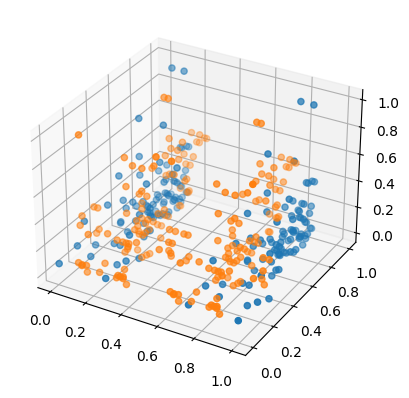

In [153]:
ax = plt.axes(projection ="3d")
ax.scatter3D(norm_haz_real_apollo['w'],norm_haz_real_apollo['q'],norm_haz_real_apollo['i'])
ax.scatter3D(norm_nohaz_real_apollo['w'],norm_nohaz_real_apollo['q'],norm_nohaz_real_apollo['i'])

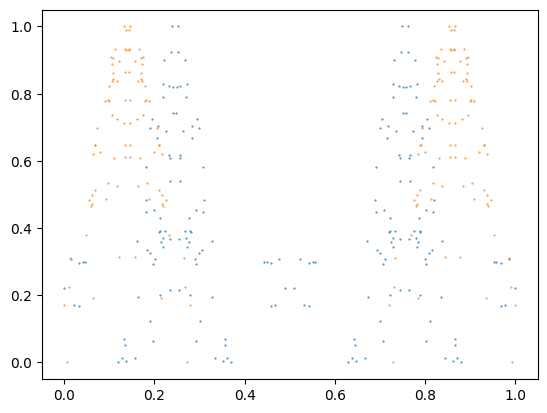

In [154]:
plt.scatter(np.array(norm_nohaz_gen_apollo['w']),np.array(norm_nohaz_gen_apollo['q']),s=.2)
plt.scatter(np.array(norm_haz_gen_apollo['w']),np.array(norm_haz_gen_apollo['q']),s=.2)

In [155]:
data=pd.concat([norm_haz_genu_apollo,norm_nohaz_genu_apollo])
data_label=[1 for i in range(len(norm_haz_genu_apollo))]
for i in range(len(norm_nohaz_genu_apollo)):
    data_label.append(0)
train_data,test_data,train_label,test_label=train_test_split(data,data_label,test_size=0.3,shuffle=True)
len(train_data)

11874

In [156]:
# test_data=pd.concat([norm_haz_gen_apollo,norm_nohaz_gen_apollo])
# test_label=[1 for i in range(len(norm_haz_gen_apollo))]
# for i in range(len(norm_nohaz_gen_apollo)):
#     test_label.append(0)
# len(test_label)

In [157]:
clf = RandomForestClassifier(max_depth=5,min_samples_split=2,)   
clf.fit(train_data,train_label)
y_pred=clf.predict(test_data)
from sklearn import metrics   
print() 
  
# using metrics module for accuracy calculation 
print("ACCURACY OF THE RANDOM FOREST MODEL: ", metrics.accuracy_score(test_label, y_pred)) 


ACCURACY OF THE RANDOM FOREST MODEL:  0.9369351669941061


In [158]:
model_xg=XGBClassifier()
model_xg.fit(train_data,train_label)
y_pred=model_xg.predict(test_data)
print() 
  
# using metrics module for accuracy calculation 
print("ACCURACY OF THE XGBOOST MODEL: ", metrics.accuracy_score(test_label, y_pred))


ACCURACY OF THE XGBOOST MODEL:  0.9785854616895874


In [159]:
model_svm=svm.SVC()
model_svm.fit(train_data,train_label)
y_pred=model_svm.predict(test_data)
print() 
  
# using metrics module for accuracy calculation 
print("ACCURACY OF THE SVM MODEL: ", metrics.accuracy_score(test_label, y_pred))


ACCURACY OF THE SVM MODEL:  0.9363457760314342
